## TEAM PARIS P6 - Sepsis Illness Classification Project

### Introduction/Background
This project aims at **_classifying patients_** who are infected with the **_sepsis illness._**

### Business Understanding
The goal of this project is to predict which patients have sepsis and to determine the likelihood of it beign postitive or negative.
To build a **_Machine Learning Model_** that **_predicts sepsis_**. Also, build an **_API (Application Programme Interface)_** and integrate the Model using **_FastAPI_**

### Data Understanding
The datasets (train and test) for this project are in csv formats. The following describes the columns present in the data.

**_ID_**-- number to represent patient ID

**_PRG_**-- Plasma glucose

**_PL_**-- Blood Work Result-1 (mu U/ml)

**_PR_**-- Blood Pressure (mm Hg)

**_SK_**-- Blood Work Result-2 (mm)

**_TS_**-- Blood Work Result-3 (mu U/ml)

**_M11_**-- Body mass index (weight in kg/(height in m)^2

**_BD2_**-- Blood Work Result-4 (mu U/ml)

**_Age_**-- patients age (years)

**_Insurance_**-- If a patient holds a valid insurance card

**_Sepsis_**-- Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

### Hypothesis & Questions

*__Null Hypothesis: H0:__* There is no relationship between Age and Sepsis.

*__Alternate Hypothesis: H1:__* There is a relationship between Age and Sepsis.




*__Assumptions:__*
1. It was assumed that the blood pressure used was the diastolic type.






*__Questions__*

1. What is the distribution of ages for patients captured in the data?
2. What is the number of patients with sepsis?
3. How many patiients have insusrance?
4. Is Blood Pressure affected by Age?
5. Which age groups are has the hihest number of sepsis?
6. What is the relationship between Age and blood BMI?
7. Does having no insurance increase the chances of a patient getting sepsis?
8. How many of the patients fall under the Normal, Elevated and High Blood Pressure?
9. How many patients in each BMI category have sepsis?


In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing all relevant libraries and packages

In [2]:
# Data Manipuulation
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,\
precision_score, recall_score, fbeta_score, make_scorer, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
#from skopt import BayesSearchCV
from sklearn.utils import class_weight

import scipy.stats as stats

# models
from sklearn import svm
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
# model interpretation

import pickle
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load preview the dataset
sepsis_data = pd.read_csv('/content/drive/MyDrive/P6/Paitients_Files_Train.csv')
# sepsis_data = pd.read_csv('C:\\Users\\user\\Downloads\\P6\\Paitients_Files_Train.csv')


sepsis_data.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


### Overview Of Dataset
Basic inspection of the dataset

In [4]:
# Listing the columns in the data
sepsis_data.columns.to_list()

['ID',
 'PRG',
 'PL',
 'PR',
 'SK',
 'TS',
 'M11',
 'BD2',
 'Age',
 'Insurance',
 'Sepssis']

In [5]:
# Checking the shape of the data
sepsis_data.shape

(599, 11)

>- **The dataset has 599 rows and 11 columns**

In [6]:
# Checking for more information about the data
sepsis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


>- **It appears all the columns are of numeric data types**

In [7]:
# Checking for missing/null values
sepsis_data.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

>- **There are no missing values in the data**

In [8]:
# Checking for duplicates
sepsis_data.duplicated().sum()

0

>- **There are no duplicates**

In [9]:
# Create a function to print the number of unique values
def print_unique_values(data):
    values = {}
    for col in data.columns:
        number = data[col].nunique()
        print(f'{col}: has {number} of unique values')

In [10]:
print_unique_values(sepsis_data)

ID: has 599 of unique values
PRG: has 17 of unique values
PL: has 129 of unique values
PR: has 44 of unique values
SK: has 51 of unique values
TS: has 164 of unique values
M11: has 233 of unique values
BD2: has 437 of unique values
Age: has 50 of unique values
Insurance: has 2 of unique values
Sepssis: has 2 of unique values


In [11]:
# Create a function to check if there are zeros in the data
def number_of_zeros(data):
    for col in data.columns:
        if col != 'Sepssis':
            count = (data[col] == 0).sum()
            print(f'Count of zeros in Column  {col} : {count}')

In [12]:
number_of_zeros(sepsis_data)

Count of zeros in Column  ID : 0
Count of zeros in Column  PRG : 93
Count of zeros in Column  PL : 5
Count of zeros in Column  PR : 28
Count of zeros in Column  SK : 175
Count of zeros in Column  TS : 289
Count of zeros in Column  M11 : 9
Count of zeros in Column  BD2 : 0
Count of zeros in Column  Age : 0
Count of zeros in Column  Insurance : 188


>- **Although there were no null values in the columns, some of the columns had 0's in the them**

In [13]:
# checking the column headers
sepsis_data.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

>- **The above cell displays the column names, however they are not descriptive enough**

#### Rename the columns

In [14]:
sepsis_data = sepsis_data.rename(columns={'PRG': 'Plasma Glucose', 'PL': 'Blood Work Result-1',
                        'PR': 'Blood Pressure','SK': 'Blood Work Result-2',
                        'TS': 'Blood Work Result-3', 'M11': 'Body Mass Index',
                        'BD2': 'Blood Work Result-4', 'Sepssis': 'Sepsis'})

In [15]:
# Checking the rename of columns
sepsis_data.head()

,ID,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


>- **Columns were successfully renamed and are now descriptive**

In [16]:
# Checking the statistics of the data
sepsis_data.describe()

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


>- **The mean age for the patients captured is 33.29. The mean blood pressure is 68.732888 mm hg which is lower than 80 mm hg, hence indicates that the patients had averagely a normal pressure**

#### Check the correlation between the various columns

In [17]:
# Find the correlation between the columns
corr_matrix = sepsis_data.corr()
corr_matrix

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
Plasma Glucose,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
Blood Work Result-1,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
Blood Pressure,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
Blood Work Result-2,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
Blood Work Result-3,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
Body Mass Index,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
Blood Work Result-4,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


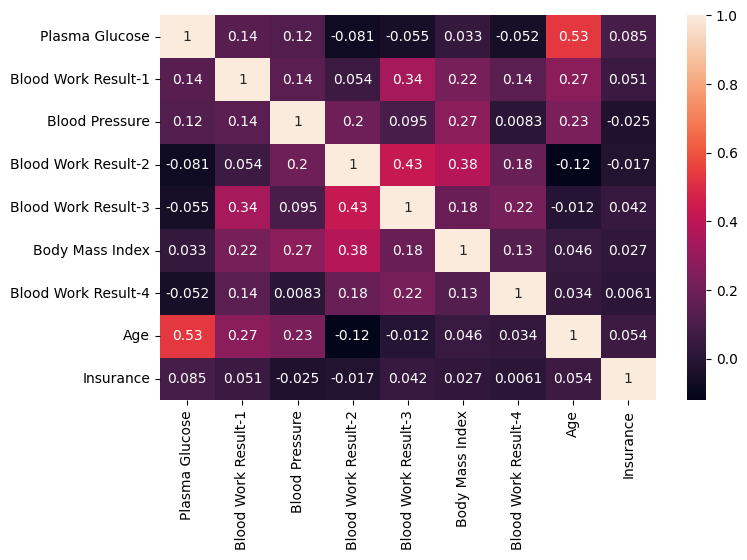

In [18]:
# Plot a heatmap for the correlations
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True)
plt.show();

In [19]:
# get the minimum value
min_corr = corr_matrix.min().min()
# get the columns involved
min_corr_cols = corr_matrix.unstack().idxmin()

print('The minimum correlation was:', min_corr)
print('The columns involved are:', min_corr_cols)

The minimum correlation was: -0.12155329275228288
The columns involved are: ('Blood Work Result-2', 'Age')


In [20]:
# get the minimum value
max_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
            .max().max())

# get the maximum value (excluding same columns)
# get the columns involved
max_corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
                 .stack().idxmax())

print('The maximun correlation was:', max_corr)
print('The columns involved are:', max_corr_cols)

The maximun correlation was: 0.5325446086908504
The columns involved are: ('Plasma Glucose', 'Age')


>- **The lowest correlation is -0.12155329275228288 between Blood Work Result-2 and Age.**

>- **The highest correlation is 0.5325446086908504 between Plasma Glucose and Age**

### Hypothesis Testing

In [21]:
# Select the Age and Sepsis columns from the dataset
age = sepsis_data['Age']
sepsis = (sepsis_data['Sepsis'] == 'Positive').astype(bool).astype(int)

# Perform correlation analysis
correlation, p_value = stats.pearsonr(age, sepsis)

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value > 0.05:
    print('Fail to reject the null hypothesis. ')
else:
    print('Reject the null hypothesis')


Correlation coefficient: 0.21023428582351436
P-value: 2.0718778891881763e-07
Reject the null hypothesis


### Univariate Anlaysis

### 1. What is the distribution of ages for patients captured in the data?

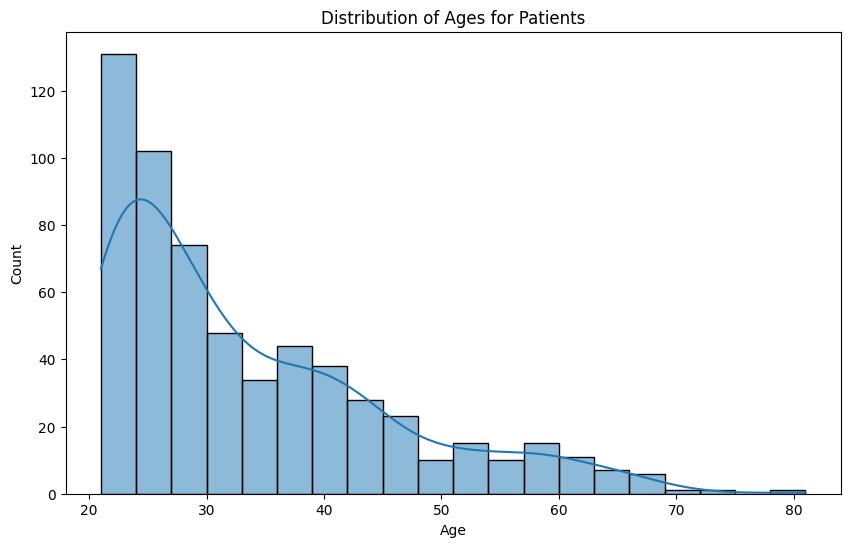

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(sepsis_data['Age'], bins=20, kde=True)
plt.title("Distribution of Ages for Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

>- **The above plot shows a distribution of the patients' ages. It's observed that there are more patients within ages 20 to 30 while fewer patients are within the 70 to 80 age group.**

### 2 What is the number of patients with sepsis?

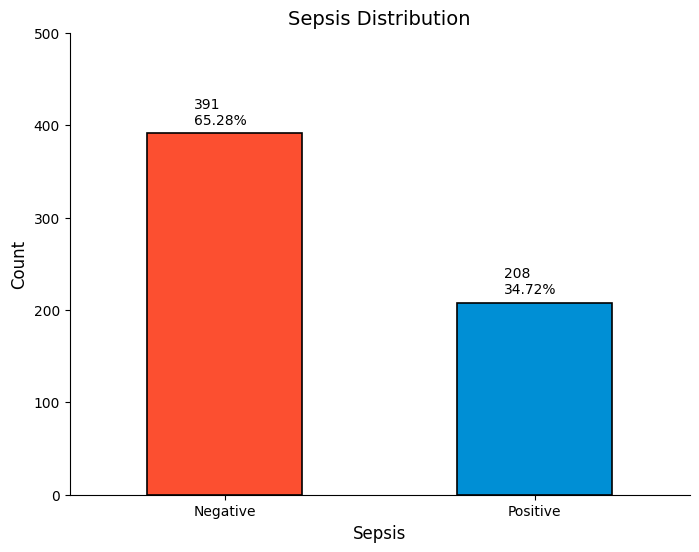

In [23]:
# Calculate the sepsis counts
sepsis_counts = sepsis_data['Sepsis'].value_counts()

# Set custom colors
colors = ['#fc4f30', '#008fd5']

# Calculate percentages
percentages = round(sepsis_counts / sepsis_counts.sum() * 100, 2).astype(str) + '%'

# Create a bar plot for sepsis distribution
plt.figure(figsize=(8, 5))
ax = sepsis_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2, figsize=(8, 6), rot=0)
ax.set_title('Sepsis Distribution', fontsize=14)
ax.set_xlabel('Sepsis', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_ylim(0, 500)

# Add count values and percentages on top of each bar
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}\n{percentages[i]}', (x + 0.15, y + height + 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

>- **The sepsis distribution shows that there are more patients with a negative case than thise of positive. A total of 208 patients were found to be positive and 391 patients were negative.**

### 3. What is the proportion of patients with insurance?

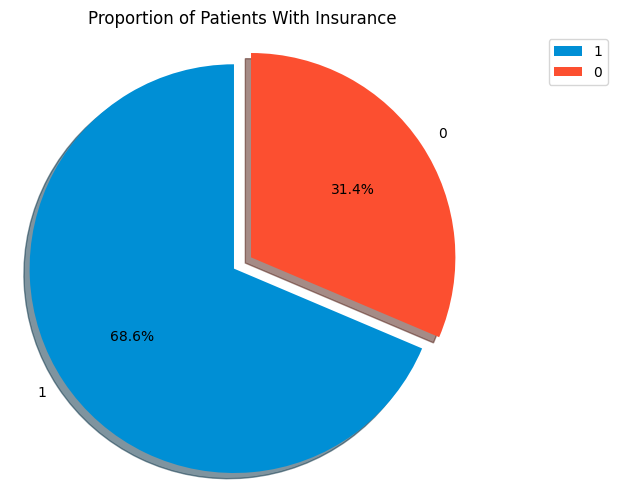

In [24]:
# Calculate the count of patients with insurance
insurance_counts = sepsis_data['Insurance'].value_counts()

# Plot the proportion of  patients with insurance_counts using a pie chart
labels = insurance_counts.index
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
plt.figure(figsize=(6, 6))
plt.pie(insurance_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Proportion of Patients With Insurance')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()

> From the pie chart, 1 represents patients who have insurance and 0 represents patients without insurance. The chart shows that there are mmore patients with insurance compared to those without. Patients with insurance is **_68.6%_**, which is more than twice the number of patients that do not have insurance.
Considering that this is also our **_target variable_**, we could conclude that the dataset is imbalanced. In essence, going into modelling would require some pre-processing to make sure we do not introduce bias into our model.

### Bivariate Analysis

### 4. Is the bood pressure affected by age?

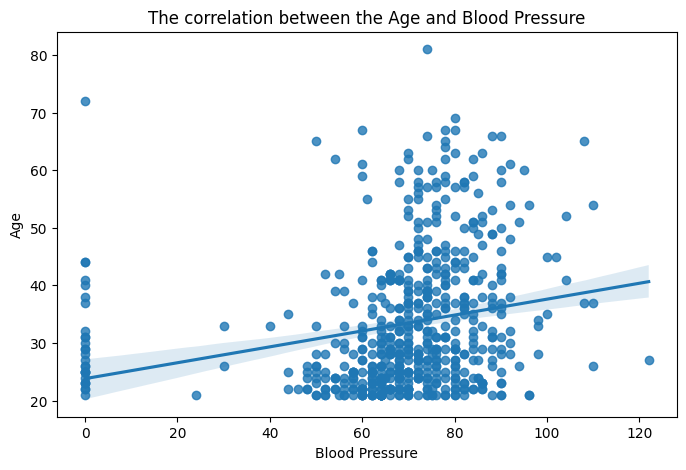

In [25]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Blood Pressure', y='Age', data=sepsis_data)
plt.title('The correlation between the Age and Blood Pressure')
plt.show()

>- This plot shows that most patients have **normal blood pressure** between **_60 to 80_**, and that some patients have **high blood pressure** around **_80 to 90_** which is considered hypertension *stage 1*. Present, are some outliers with **low blood pressure** below **_20_** and very **_high blood pressure_** above **_100_** which indicates hypertension *stage 2*

### 5. Which age group has the highest number of sepsis

In [26]:
# Filter data for patients with sepsis
sepsis_age_group = sepsis_data[sepsis_data['Sepsis'] == 'Positive']

# Create an interactive histogram using Plotly
fig = px.histogram(sepsis_age_group, x='Age', nbins=20,
                   labels={'Age': 'Age', 'count': 'Count'},
                   title='Distribution of Ages for Patients With Highest Cases of Sepsis',
                   color_discrete_sequence=['violet'])

# Update the layout for better visualization
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Count",
)

# Show the interactive plot
fig.show()

>- The histogram indicates that the age group with the most cases of sepsis are between age **__25 to 29__**, while the age group with the lowest case are **__60 years and above__**

### 6. What is the relationship between Age and Blood Pressure?

In [27]:
# Sample data (replace this with your actual data)
age_bmi = {
    'Blood Pressure': ['Normal', 'Elevated', 'High', 'Normal', 'Elevated'],
    'Age': [45, 55, 65, 50, 40]
}
age_bmi = pd.DataFrame(age_bmi)

# Plot the relationship between Age and Blood Pressure using Plotly box plot
fig = px.box(age_bmi, x='Blood Pressure', y='Age', color='Blood Pressure',
             labels={'Blood Pressure': 'Blood Pressure Category', 'Age': 'Age'},
             title='Relationship between Age and Blood Pressure')

# Update the layout for better visualization
fig.update_layout(
    xaxis_title="Blood Pressure Category",
    yaxis_title="Age",
)

# Show the interactive plot
fig.show()

>- This boxplot shows a comparison between the various blood categories and their corresponding ages. The patients with Normal and Elevated blood pressures both have a **_median age of 47_**, however, the **_normal category_** has patients whose ages range from **_45 to 50 years_**, while patients in the **_elevated category_** are between the ages of **_40 and 55_** years. Patients with **_high blood pressure_** are **_above 60 years of age_**

### 7. Does having no insurance increase the chances of a patient getting sepsis?

In [28]:
# Plot the impact of having insurance on sepsis occurrence
fig = px.histogram(sepsis_data, x='Insurance', color='Sepsis', barmode='group',
                   labels={'Insurance': 'Insurance', 'Sepsis': 'Sepsis'},
                   color_discrete_map={"Negative": "lightcoral", "Positive": "lightgreen"})

fig.update_layout(
    title="Impact of Having Insurance on Sepsis Occurrence",
    xaxis_title="Insurance",
    yaxis_title="Count",
)

# Show the interactive plot
fig.show()


>- Observing the plot, 0 represents patients without insurance and 1 represents patients with sepsis. The nubmer of patients who have insurance are more than those without insurance.
>- For patients without insurance, the negative cases are 131 while positive sepsis is around 57.
>- The patients with insurance also shows that negative cases are 260 while positive sepsis cases are 151.
When we look at the patients without insurance, clearly, not having insurance has no impact on the ocuurence of sepsis.
>- This may however, be as a result of other parameters, in the data, like imbalance in the target variable, "sepsis"

### Multivariate Analysis

### 8. How many patients are under weight, have healthy weight, over weight, obesed and severe obesed?


The follwing are the BMI ranges

>- under 18.5 – This is described as underweight.
>- between 18.5 and 24.9 – This is described as the 'healthy range'.
>- between 25 and 29.9 – This is described as overweight.
>- between 30 and 39.9 – This is described as obesity.
>- 40 or over – This is described as severe obesity.

In [29]:
# function to create a new column 'BMI

def create_bmi_range(row):
    if (row['Body Mass Index'] <= 18.5):
        return 'Under Weight'
    elif (row['Body Mass Index'] > 18.5) and (row['Body Mass Index'] <= 24.9):
        return 'Healthy Weight'
    elif (row['Body Mass Index'] > 24.9) and (row['Body Mass Index'] <= 29.9):
        return 'Overweight'
    elif (row['Body Mass Index'] > 29.9) and (row['Body Mass Index'] < 40):
        return 'Obesity'
    elif row['Body Mass Index'] >= 40:
        return 'Severe Obesity'

In [30]:
weight = sepsis_data.copy()

In [31]:
weight['BMI Ranges'] = weight.apply(create_bmi_range, axis=1)
range_count = weight['BMI Ranges'].value_counts()

In [32]:
# Define custom colors for each BMI range
colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral']

# Plot the number of patients in each BMI range using Plotly bar plot
fig = px.bar(x=range_count.index, y=range_count.values,
             labels={'x': 'The BMI Ranges', 'y': 'Number of Patients'},
             title='The number of patients in each BMI range',
             color=range_count.index,  # Use BMI range as the color parameter to get different colors for each bar
             color_discrete_sequence=colors)  # Use custom colors defined above

# Update the layout for better visualization
fig.update_layout(
    xaxis_title="The BMI Ranges",
    yaxis_title="Number of Patients",
)

# Show the interactive plot
fig.show()

>- The image shows that there more patients who are obese and lesser number of patients that are underweight.
Also, the number of patients with healthy weight is 79 which is less than 25% of the total number of patients, while the number of patients who are overweight (inccldes overweight, obesity, severer obesity) is more than 500.

### 9. Distribution of patients in different BMI categories with sepsis

In [33]:
# Distribution of patients in different BMI categories
data = {
    'Body Mass Index': [21.5, 26.3, 19.8, 32.0, 27.5],
    'Sepsis': ['Negative', 'Positive', 'Positive', 'Negative', 'Positive']
}
sepsis_data = pd.DataFrame(sepsis_data)

# Define BMI labels and bins
bmi_labels = ['Underweight', 'Healthy weight', 'Overweight', 'Obese', 'Severely Obese']
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, np.inf]

# Create a new column for BMI categories
sepsis_data['BMI_Category'] = pd.cut(sepsis_data['Body Mass Index'], bins=bmi_bins, labels=bmi_labels)

# Plot the distribution of patients in different BMI categories using Plotly bar plot
fig = px.histogram(sepsis_data, x='BMI_Category', color='Sepsis', barmode='group',
                   category_orders={'BMI_Category': bmi_labels},
                   labels={'BMI_Category': 'BMI Category', 'count': 'Count'},
                   color_discrete_map={"Negative": "lightcoral", "Positive": "lightgreen"})

# Update the layout for better visualization
fig.update_layout(
    title="Distribution of Patients in Different BMI Categories",
    xaxis_title="BMI Category",
    yaxis_title="Count",
)

# Show the interactive plot
fig.show()

>- The distibuution plot shows the nuumber of sepsis cases (positive and negative) for each BMI category. The plot shows that most patients found to be positive with sepsis are overweight whereas healthy patients have less cases of sepsis. Interestingly, patients that are uderweight show no sign of sepsis

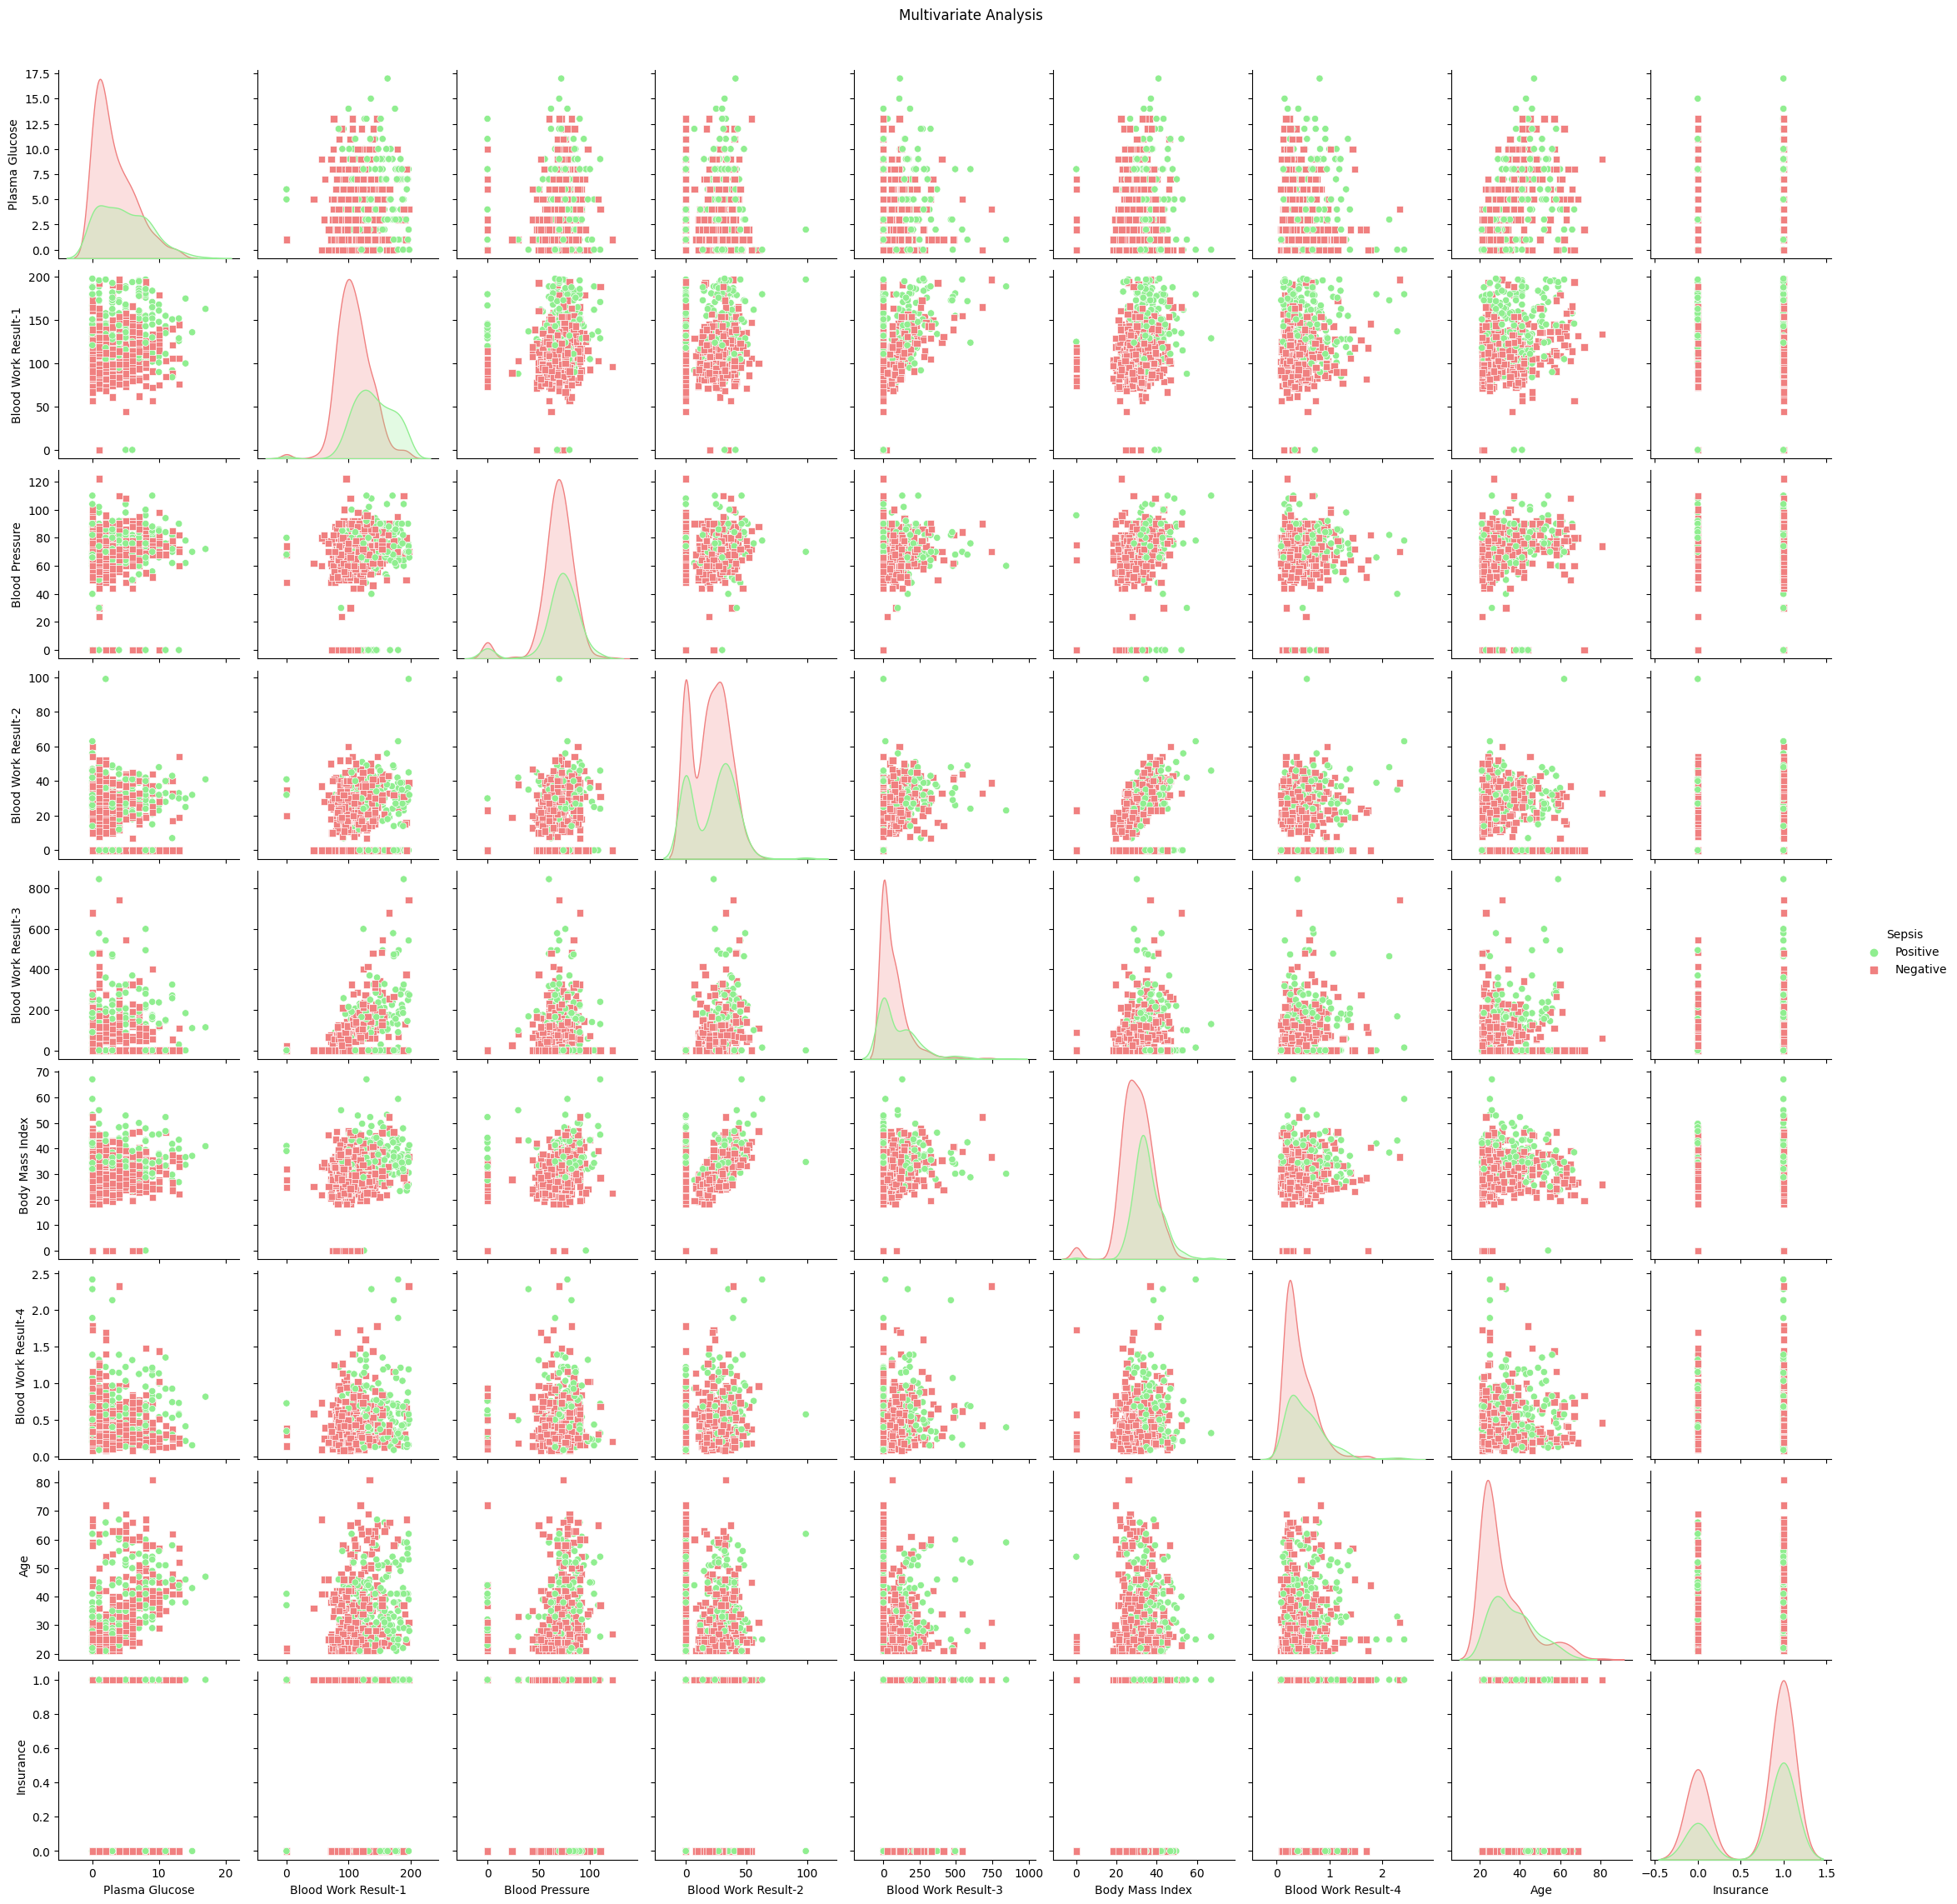

In [34]:
# Multivariate paiplot
sns.pairplot(sepsis_data, hue='Sepsis', diag_kind='kde', markers=["o", "s"], palette={"Positive": "lightgreen", "Negative": "lightcoral"})
plt.suptitle("Multivariate Analysis", y=1.02)
plt.show()



## MODELLING

In [35]:
train = pd.read_csv('/content/drive/MyDrive/P6/Paitients_Files_Train.csv')

train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [36]:
col_name_1 = {
    'ID' : 'ID' ,
    'PRG' : 'PlasmaGlucose',
    'PL' : 'Blood.W.Result-1',
    'PR' : 'BloodPressure',
    'SK' : 'Blood.W.Result-2',
    'TS' : 'Blood.W.Result-3',
    'M11' : 'BMI',
    'BD2' : 'Blood.W.Result-4',
    'Age' : 'Age',
    'Insurance' : 'Insurance'
}

train.rename(columns=col_name_1, inplace= True)

In [37]:
eval = pd.read_csv('/content/drive/MyDrive/P6/Paitients_Files_Test.csv')
eval.rename(columns=col_name_1, inplace= True)

In [38]:
train.drop('ID', axis=True, inplace = True)

## Selecting target and features (before scaling)

In [39]:
X = train.drop('Sepssis', axis = 1)
y = train['Sepssis']

In [41]:
x_train, x_test, y_train, y_test = train_test_split (X, y , test_size=0.2, random_state=42, stratify =y)

In [42]:
# x_train, x_test, y_train, y_test = train_test_split (X, y , test_size=0.2, random_state=42) #, stratify = y_train)

In [43]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((479, 9), (120, 9), (479,), (120,))

## **Scale numeric features, encode categorical column**

In [44]:
x_train.head()

,PlasmaGlucose,Blood.W.Result-1,BloodPressure,Blood.W.Result-2,Blood.W.Result-3,BMI,Blood.W.Result-4,Age,Insurance
161,7,102,74,40,105,37.2,0.204,45,1
236,7,181,84,21,192,35.9,0.586,51,0
497,2,81,72,15,76,30.1,0.547,25,1
40,3,180,64,25,70,34.0,0.271,26,0
372,0,84,64,22,66,35.8,0.545,21,1


In [45]:
y_train.head()

161    Negative
236    Positive
497    Negative
40     Negative
372    Negative
Name: Sepssis, dtype: object

**Scale the numerical features**

In [46]:
scaler = StandardScaler()

In [47]:
X_scaled = pd.DataFrame(scaler.fit_transform(x_train))

X_scaled

,0,1,2,3,4,5,6,7,8
0,0.936259,-0.541760,0.292468,1.227874,0.278949,0.706624,-0.824511,0.991413,0.678503
1,0.936259,1.923458,0.812484,0.025886,1.108512,0.534049,0.260234,1.504619,-1.473834
2,-0.563634,-1.197071,0.188465,-0.353689,0.002429,-0.235902,0.149488,-0.719274,0.678503
3,-0.263656,1.892252,-0.227548,0.278936,-0.054783,0.281824,-0.634255,-0.633740,-1.473834
4,-1.163592,-1.103456,-0.227548,0.089149,-0.092923,0.520774,0.143808,-1.061412,0.678503
...,...,...,...,...,...,...,...,...,...
474,-1.163592,-1.041045,-0.019541,0.721774,-0.722247,0.520774,-0.727963,-0.719274,0.678503
475,0.036323,0.706451,0.916487,-1.302627,-0.722247,1.609325,0.427773,-0.975877,-1.473834
476,1.536217,0.082345,-0.643560,-1.302627,-0.722247,0.188899,1.759568,-0.034999,0.678503
477,0.036323,0.768862,-0.539557,0.468724,0.612681,-0.315552,-0.588821,0.307138,0.678503


**Encode the categorical column**

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()

In [53]:
y_encoded = pd.DataFrame(le.fit_transform(y_train))

y_encoded.head()

,0
0,0
1,1
2,0
3,0
4,0


**Combine the two**

In [54]:
train_ready = pd.concat([X_scaled , y_encoded ], axis=1)

In [55]:
train_ready

,0,1,2,3,4,5,6,7,8,0
0,0.936259,-0.541760,0.292468,1.227874,0.278949,0.706624,-0.824511,0.991413,0.678503,0
1,0.936259,1.923458,0.812484,0.025886,1.108512,0.534049,0.260234,1.504619,-1.473834,1
2,-0.563634,-1.197071,0.188465,-0.353689,0.002429,-0.235902,0.149488,-0.719274,0.678503,0
3,-0.263656,1.892252,-0.227548,0.278936,-0.054783,0.281824,-0.634255,-0.633740,-1.473834,0
4,-1.163592,-1.103456,-0.227548,0.089149,-0.092923,0.520774,0.143808,-1.061412,0.678503,0
...,...,...,...,...,...,...,...,...,...,...
474,-1.163592,-1.041045,-0.019541,0.721774,-0.722247,0.520774,-0.727963,-0.719274,0.678503,0
475,0.036323,0.706451,0.916487,-1.302627,-0.722247,1.609325,0.427773,-0.975877,-1.473834,1
476,1.536217,0.082345,-0.643560,-1.302627,-0.722247,0.188899,1.759568,-0.034999,0.678503,1
477,0.036323,0.768862,-0.539557,0.468724,0.612681,-0.315552,-0.588821,0.307138,0.678503,0


### **SELECTING TARGET AND FEATURES**

In [56]:
# Select features using slicing
X_train = train_ready.iloc[:, :-1]

X_train.head()

,0,1,2,3,4,5,6,7,8
0,0.936259,-0.541760,0.292468,1.227874,0.278949,0.706624,-0.824511,0.991413,0.678503
1,0.936259,1.923458,0.812484,0.025886,1.108512,0.534049,0.260234,1.504619,-1.473834
2,-0.563634,-1.197071,0.188465,-0.353689,0.002429,-0.235902,0.149488,-0.719274,0.678503
3,-0.263656,1.892252,-0.227548,0.278936,-0.054783,0.281824,-0.634255,-0.633740,-1.473834
4,-1.163592,-1.103456,-0.227548,0.089149,-0.092923,0.520774,0.143808,-1.061412,0.678503


In [57]:
# Selecting the target using target
y_train = pd.DataFrame(train_ready.iloc[:, -1])

y_train.head()

,0
0,0
1,1
2,0
3,0
4,0


### **MODEL SELECTION, FITTING, PREDICTION, EVAL**

In [58]:
# instance creation
logistic = LogisticRegression ()           # 1
knn = KNeighborsClassifier ()              # 2
decisiontree = DecisionTreeClassifier ()   # 3
random = RandomForestClassifier ()         # 4
gradient = GradientBoostingClassifier ()   # 5

In [59]:
# fit all models to the train and eval
logistic.fit(x_train, y_train)
knn.fit(x_train, y_train)
decisiontree.fit(x_train, y_train)
random.fit(x_train, y_train)
gradient.fit(x_train, y_train)


GradientBoostingClassifier()

In [60]:
# Make predictions
logistc_pred = (logistic.fit(x_train, y_train)).predict(x_test)
knn_pred = (knn.fit(x_train, y_train)).predict(x_test)
decisiontree_pred = (decisiontree.fit(x_train, y_train)).predict(x_test)
random_pred = (random.fit(x_train, y_train)).predict(x_test)
gradient_pred = (gradient.fit(x_train, y_train)).predict(x_test)


### Make Evaluations to select the best model

In [61]:
from sklearn.metrics import f1_score, accuracy_score

**Use label encoder to y_test**

In [62]:
y_test_encoded = pd.DataFrame(le.fit_transform(y_test))

y_test_encoded.head()

,0
0,0
1,1
2,0
3,0
4,0


In [63]:
# for logistic
r21 = f1_score( y_test_encoded, logistc_pred)
mse1 =accuracy_score( y_test_encoded, logistc_pred)

# for knn
r22 = f1_score( y_test_encoded, knn_pred)
mse2 =accuracy_score( y_test_encoded, knn_pred)

# for decision tree
r23 = f1_score( y_test_encoded, decisiontree_pred)
mse3 =accuracy_score( y_test_encoded, decisiontree_pred)

# for random
r24 = f1_score( y_test_encoded, random_pred)
mse4 = accuracy_score( y_test_encoded, random_pred)

# gradient
r25 = f1_score( y_test_encoded, gradient_pred)
mse5 =accuracy_score( y_test_encoded, gradient_pred)


In [64]:
metrics1 = pd.DataFrame ([['Linear_Regression', r21, mse1]], columns=['model', 'F1 SCORE', 'ACCURACY SCORE'])
metrics2 = pd.DataFrame ([['Knn', r22, mse2]], columns=['model', 'F1 SCORE', 'ACCURACY SCORE'])
metrics3 = pd.DataFrame ([['decision tree', r23, mse3]], columns=['model', 'F1 SCORE', 'ACCURACY SCORE'])
metrics4 = pd.DataFrame ([['Random forest', r24, mse4]], columns=['model', 'F1 SCORE', 'ACCURACY SCORE'])
metrics5 = pd.DataFrame ([['Gradient', r25, mse5]], columns=['model', 'F1 SCORE', 'ACCURACY SCORE'])

metrics = metrics1.append([metrics2, metrics3, metrics4, metrics5], ignore_index=True)

metrics

,model,F1 SCORE,ACCURACY SCORE
0,Linear_Regression,0.634146,0.750000
1,Knn,0.558140,0.683333
2,decision tree,0.602410,0.725000
3,Random forest,0.547619,0.683333
4,Gradient,0.564103,0.716667


**APPLY SMOTE TO BALANCE THE DATASET**

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [67]:
# Make predictions using classifiers after applying SMOTE
logistic_pred_smote = logistic.fit(x_train_smote, y_train_smote).predict(x_test)
knn_pred_smote = knn.fit(x_train_smote, y_train_smote).predict(x_test)
decisiontree_pred_smote = decisiontree.fit(x_train_smote, y_train_smote).predict(x_test)
random_pred_smote = random.fit(x_train_smote, y_train_smote).predict(x_test)
gradient_pred_smote = gradient.fit(x_train_smote, y_train_smote).predict(x_test)

In [68]:
# for logistic
r21 = f1_score( y_test_encoded, logistic_pred_smote)
mse1 =accuracy_score( y_test_encoded, logistic_pred_smote)

# for knn
r22 = f1_score( y_test_encoded, knn_pred_smote)
mse2 =accuracy_score( y_test_encoded, knn_pred_smote)

# for decision tree
r23 = f1_score( y_test_encoded, decisiontree_pred_smote)
mse3 =accuracy_score( y_test_encoded, decisiontree_pred_smote)

# for random
r24 = f1_score( y_test_encoded, random_pred_smote)
mse4 = accuracy_score( y_test_encoded, random_pred_smote)

# gradient
r25 = f1_score( y_test_encoded, gradient_pred_smote)
mse5 =accuracy_score( y_test_encoded, gradient_pred_smote)


In [69]:
metrics1 = pd.DataFrame ([['Linear_Regression', r21, mse1]], columns=['model', 'F1 SCORE', 'ACCURACY SCORE'])
metrics2 = pd.DataFrame ([['Knn', r22, mse2]], columns=['model', 'F1 SCORE', 'ACCURACY SCORE'])
metrics3 = pd.DataFrame ([['decision tree', r23, mse3]], columns=['model', 'F1 SCORE', 'ACCURACY SCORE'])
metrics4 = pd.DataFrame ([['Random forest', r24, mse4]], columns=['model', 'F1 SCORE', 'ACCURACY SCORE'])
metrics5 = pd.DataFrame ([['Gradient', r25, mse5]], columns=['model', 'F1 SCORE', 'ACCURACY SCORE'])

metrics = metrics1.append([metrics2, metrics3, metrics4, metrics5], ignore_index=True)

metrics

,model,F1 SCORE,ACCURACY SCORE
0,Linear_Regression,0.652632,0.725000
1,Knn,0.555556,0.600000
2,decision tree,0.613636,0.716667
3,Random forest,0.577778,0.683333
4,Gradient,0.584270,0.691667


**HYPER PARAMETER TUNING**

In [70]:
from sklearn.model_selection import GridSearchCV

In [95]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],            # Regularization parameter
    'penalty': ['l1', 'l2'],                 # Regularization type
    'solver': ['liblinear', 'saga'],         # Optimization algorithm
    'max_iter': [100, 200, 300],
}

In [96]:
# Initialize GradientBoostingClassifier
#gradient = GradientBoostingClassifier(random_state=42)
logistic = LogisticRegression ()

In [97]:
grid_search = GridSearchCV(logistic, param_grid, cv=5, verbose=2, n_jobs=-1)


In [98]:
# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     logistic,
#     param_grid=param_grid,
#     scoring={'Accuracy': 'accuracy', 'F1': make_scorer(accuracy_score)},
#     refit=False,
#     cv=5
# )

In [99]:
# Fit the grid search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [100]:
grid_search.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [103]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.7696498599439775


## **Check randomized cv to seek best results**

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression

In [107]:
# Initialize model
logistic_reg = LogisticRegression(random_state=42)

In [108]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.1, 1.0, 10.0],                         # Inverse of regularization strength
    'fit_intercept': [True, False],                # Whether to calculate the intercept for this model
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Solver for optimization
    'max_iter': [100, 200, 300]                    # Maximum number of iterations for solver to converge
}


In [109]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    logistic_reg,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_log_loss',  # Logarithmic loss metric for classification problems
    cv=5,
    random_state=42
)


In [112]:
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.1, 1.0, 10.0],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='neg_log_loss')

In [85]:
# evaluate best model with f1_score
accuracy_score( y_test_encoded, gradient_pred)

0.7166666666666667